<a href="https://colab.research.google.com/github/TranTan1306/BaiTapAI/blob/main/Insurance_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

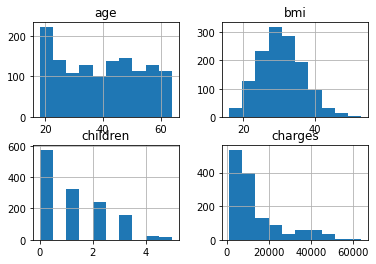

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = '/content/insurance.csv'
data = pd.read_csv(url)
data.hist()
plt.show()

In [ ]:
correlations = data.corr()
correlations

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: >

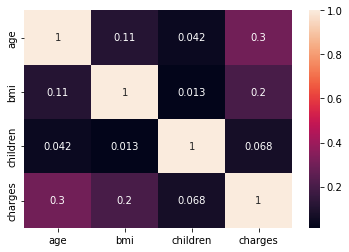

In [ ]:
sns.heatmap(correlations,annot=True)

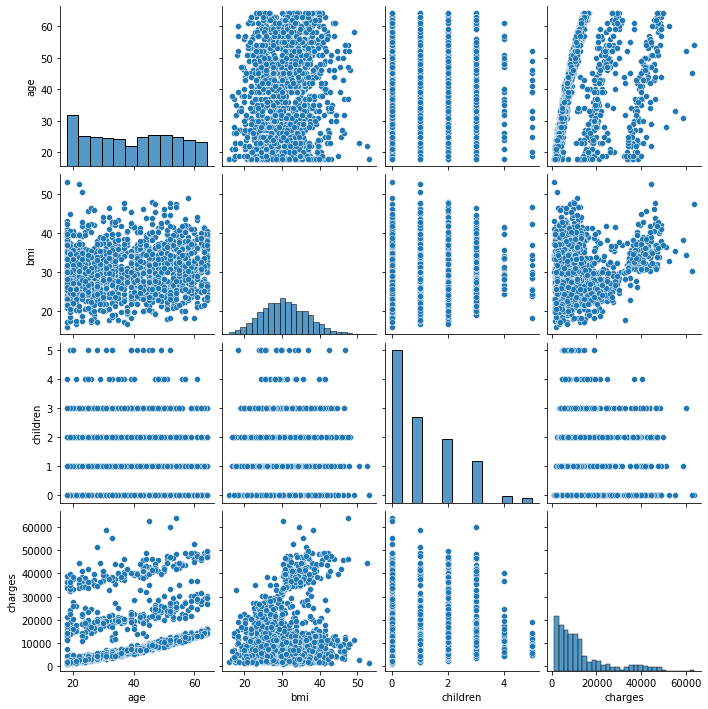

In [ ]:
sns.pairplot(data)

In [57]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(pd.DataFrame(data['charges']), data['age'])
print('Intercept:', model.intercept_)
print('Coeficient:', model.coef_)
print('Accuracy:', model.score(pd.DataFrame(data['charges']), data['age']))

Intercept: 34.603416896331794
Coeficient: [0.00034691]
Accuracy: 0.08940589967885781


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


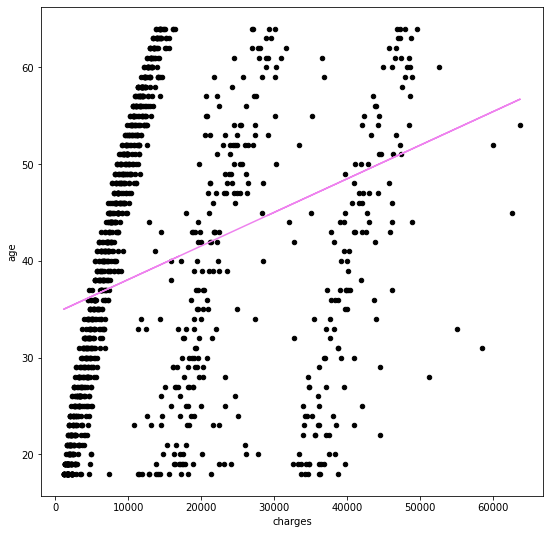

In [58]:
y_pred = model.predict(pd.DataFrame(data['charges']))
data.plot(kind='scatter', x='charges', y='age', figsize = (9,9), color='black')
plt.plot(data['charges'], y_pred, color='violet')

In [49]:
model = linear_model.LinearRegression()
X = pd.DataFrame([data['charges'], data['charges']**2, data['charges']**3, data['charges']**4]).T
model.fit(X, data['age'])
print('Intercept:', model.intercept_)
print('Coeficient:',model.coef_)
print('Accuracy',model.score(X,data['age']))

Intercept: 3.303433683236129
Coeficient: [ 8.86005365e-03 -5.54698255e-07  1.26612497e-11 -9.40375978e-17]
Accuracy 0.544474278954871


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


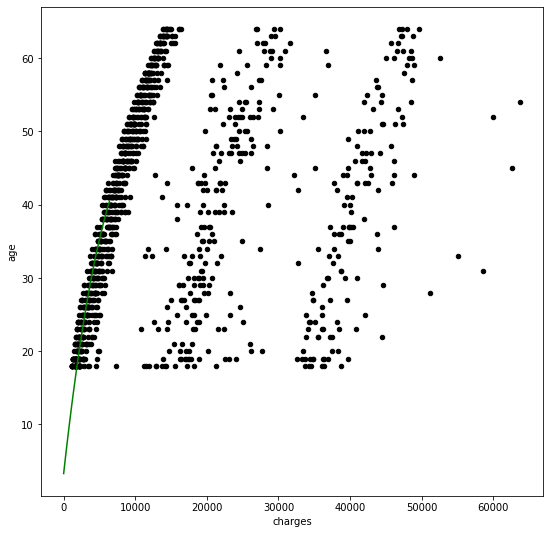

In [60]:
range = np.arange(0,6500,100)
x_range = pd.DataFrame([range,range**2,range**3,range**4]).T
model.fit(X,data['age'])
y_pred = model.predict(x_range)
data.plot(kind='scatter',x='charges',y='age',figsize=(9,9),color='black')
plt.plot(range, y_pred, color='green')